# Project team's ID : PTID-CDS-OCT-23-1668

# Client: Sales Effectiveness | Category: Product Sales

# Project Ref: PM-PR-0019

## Business Case Summary: Enhancing Sales Effectiveness through Machine Learning

### Company Overview:
FicZon Inc is a prominent IT solution provider offering a diverse range of products, including on-premises solutions and Software as a Service (SAAS) offerings. With a primary focus on digital channels and website-driven leads, FicZon has historically thrived on effective sales force management.

### Market Challenges:
In the face of a maturing market and increased competition, FicZon is witnessing a decline in sales performance. The traditional reliance on manual lead categorization, heavily dependent on the sales team, has become a bottleneck. Lead quality, a pivotal factor in sales effectiveness, is currently determined through post-analysis rather than in real-time.

### Opportunity for Improvement:
Recognizing the need for innovation, FicZon aims to leverage Machine Learning (ML) to revolutionize the lead categorization process. The objective is to pre-categorize leads based on ML algorithms, providing a more accurate and timely assessment of lead quality.

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
sales =pd.read_csv(r"C:\Users\DELL\Downloads\project_sales.csv")
sales

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
995,12-10-2018 14:54,9.0,Call,916XXXXXXX,#VALUE!,Sales-Agent-9,Mumbai,Mode-1,Just Enquiry
996,12-10-2018 14:44,19.0,Website,982XXXXXXX,kXXXXXXX@gmail.com,Sales-Agent-11,Mumbai,Mode-3,Potential
997,12-10-2018 13:45,18.0,Call,974XXXXXXX,sXXXXXXXahoo.co.in,Sales-Agent-3,Chennai,Mode-1,Potential
998,12-10-2018 13:43,19.0,Call,740XXXXXXX,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-5,CONVERTED


### The analysis of how different columns relate to the target variable 'Status' has been conducted. Here's a brief summary for each column:

#### Created:
The 'Created' column, which likely represents the timestamp of when the sales lead was created, shows varying       counts across different 'Status' categories. This suggests that the time of lead creation might influence the eventual status of the lead.

#### Product_ID:
The relationship between 'Product_ID' and 'Status' would show if certain products are more likely to result in a sale or a lost lead. However, this is a numeric column with a small number of unique values, so a more detailed analysis would be needed to draw conclusions.

#### Source:
This column indicates the source of the lead. The relationship between 'Source' and 'Status' can reveal which sources are more effective in generating successful leads.

#### Mobile:
 Although this column has a significant number of missing values, the relationship between the provided mobile numbers and 'Status' could indicate if the presence of a mobile number affects the lead's outcome.

#### EMAIL:
The 'EMAIL' column has no missing values, and its relationship with 'Status' could show if certain email domains or patterns correlate with lead outcomes.

#### Sales_Agent:
Different sales agents may have varying success rates, and the relationship between 'Sales_Agent' and 'Status' can highlight agent performance.

#### Location:
The 'Location' column's relationship with 'Status' could indicate if geographical factors play a role in the success of sales leads.

#### Delivery_Mode:
This column's relationship with 'Status' might reveal if the mode of delivery influences the lead's outcome.

# Basic checks

In [3]:
#getting the first five rows
sales.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [4]:
#getting the last five rows
sales.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
995,12-10-2018 14:54,9.0,Call,916XXXXXXX,#VALUE!,Sales-Agent-9,Mumbai,Mode-1,Just Enquiry
996,12-10-2018 14:44,19.0,Website,982XXXXXXX,kXXXXXXX@gmail.com,Sales-Agent-11,Mumbai,Mode-3,Potential
997,12-10-2018 13:45,18.0,Call,974XXXXXXX,sXXXXXXXahoo.co.in,Sales-Agent-3,Chennai,Mode-1,Potential
998,12-10-2018 13:43,19.0,Call,740XXXXXXX,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-5,CONVERTED
999,12-10-2018 13:37,9.0,Call,955XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-3,Delhi,Mode-3,Potential


In [5]:
##To check data type and null values for all columns
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        1000 non-null   object 
 1   Product_ID     965 non-null    float64
 2   Source         995 non-null    object 
 3   Mobile         1000 non-null   object 
 4   EMAIL          1000 non-null   object 
 5   Sales_Agent    992 non-null    object 
 6   Location       966 non-null    object 
 7   Delivery_Mode  1000 non-null   object 
 8   Status         1000 non-null   object 
dtypes: float64(1), object(8)
memory usage: 70.4+ KB


In [6]:
##Used to view some basic statistical details like percentile,mean,std etc.
sales.describe()

,Product_ID
count,965.000000
mean,16.337824
std,5.768518
min,1.000000
25%,15.000000
50%,18.000000
75%,19.000000
max,27.000000


In [7]:
#It will give you info about categorical data/columns
sales.describe(include='O')

,Created,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,1000,995,1000,1000,992,966,1000,1000
unique,921,13,271,170,8,15,5,11
top,15-10-2018 10:36,Call,XXXXXXX,#VALUE!,Sales-Agent-9,Other Locations,Mode-1,In Progress Positive
freq,4,374,83,311,216,365,374,203


In [8]:
#checking how many null values are present in data
sales.isnull().sum()

Created           0
Product_ID       35
Source            5
Mobile            0
EMAIL             0
Sales_Agent       8
Location         34
Delivery_Mode     0
Status            0
dtype: int64

# Domain Analysis

In [9]:
domain_analysis=pd.DataFrame({
    'Data Type':sales.dtypes,
    'Unique count':sales.nunique(),
    'Missing values':sales.isnull().sum(),
    '% Missing values':(sales.isnull().sum()/len(sales)*100)
}).reset_index()

domain_analysis.rename(columns={'index':'column'},inplace=True)

domain_analysis

,column,Data Type,Unique count,Missing values,% Missing values
0,Created,object,921,0,0.0
1,Product_ID,float64,19,35,3.5
2,Source,object,13,5,0.5
3,Mobile,object,271,0,0.0
4,EMAIL,object,170,0,0.0
5,Sales_Agent,object,8,8,0.8
6,Location,object,15,34,3.4
7,Delivery_Mode,object,5,0,0.0
8,Status,object,11,0,0.0


### The domain analysis of the dataset reveals the following insights:

1) The 'Created' column is of object type with no missing values, indicating it likely contains date-time information.
2) 'Product_ID' is a numeric column with a small number of unique values and a few missing entries.
3) 'Source', 'Mobile', 'EMAIL', 'Sales_Agent', 'Location', 'Delivery_Mode', and 'Status' are all object types, suggesting they contain categorical data.
4) The 'Mobile' column has a significant number of missing values, over 24%.
5) 'Product_ID' and 'Location' have a small percentage of missing values, less than 1%.
6) 'Source' and 'Sales_Agent' have very few missing values.
7) 'EMAIL', 'Delivery_Mode', and 'Status' columns have no missing values.

# Data Preprocessing

In [10]:
sales.head(10)

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
5,14-11-2018 07:33,NaN,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
6,14-11-2018 05:58,NaN,Website,XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
7,14-11-2018 05:49,NaN,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
8,14-11-2018 05:40,NaN,Website,078XXXXXXX,DXXXXXXXheblue.com,Sales-Agent-10,NaN,Mode-5,Open
9,14-11-2018 05:06,NaN,Website,XXXXXXX,jXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [11]:
sales.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [12]:
#dropping the columns which are no use in analysis

sales.drop("EMAIL",axis=1,inplace=True)
sales.drop("Mobile",axis=1,inplace=True)
sales.drop("Created",axis=1,inplace=True)

In [13]:
sales.shape

(1000, 6)

In [14]:
sales.isnull().sum()

Product_ID       35
Source            5
Sales_Agent       8
Location         34
Delivery_Mode     0
Status            0
dtype: int64

In [15]:
# Dropping rows with missing data because they are few
sales.replace('',np.nan,inplace=True)
sales.dropna(inplace=True)
sales.reset_index(inplace=True,drop=True)
sales.shape

(957, 6)

In [16]:
# Compressing and Merging the labels in column

sales.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-Quora',
                    'Live Chat-CPC','Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Youtube',
                    'Live Chat-Justdial'],'Live Chat',inplace=True)
sales.Source.replace(['Existing Client','CRM form','Personal Contact'],'Existing Customer',inplace=True)
sales.Source.replace('By Recommendation','Customer Referral',inplace=True)
sales.Source.replace(['US Website','Just Dial'],'Website',inplace=True)
sales.Source.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

In [17]:
#checked value_counts of source column Afer compressing and merging the label in column
sales['Source'].value_counts()

Call                 370
Live Chat            342
Website              223
Customer Referral     17
Existing Customer      4
Campaign               1
Name: Source, dtype: int64

In [18]:
#checked value_counts of location column before Compressing and Merging the labels in column
sales['Location'].value_counts()

Other Locations    359
Bangalore          250
Chennai            115
Hyderabad           55
Mumbai              54
Delhi               46
UAE                 14
Pune                14
Trivandrum          11
USA                 10
AUSTRALIA            9
Kolkata              8
UK                   7
Singapore            4
EUROPE               1
Name: Location, dtype: int64

In [19]:
## Compressing and Merging the labels in column
sales.Location.replace(['UAE','USA','UK','AUSTRALIA','Singapore','Malaysia','EUROPE'],'Foreign',inplace=True)
sales.Location.replace(['Howrah','Kolkata','Trivandrum'],'Other Locations',inplace=True)

In [20]:
#checked value_counts of Location column Afer compressing and merging the label in column
sales['Location'].value_counts()

Other Locations    378
Bangalore          250
Chennai            115
Hyderabad           55
Mumbai              54
Delhi               46
Foreign             45
Pune                14
Name: Location, dtype: int64

In [21]:
sales['Product_ID'].value_counts()

18.0    254
15.0    196
19.0    163
9.0     117
27.0     95
5.0      50
25.0     17
20.0     16
10.0     15
12.0      9
2.0       7
1.0       7
3.0       3
13.0      3
11.0      2
21.0      1
24.0      1
26.0      1
Name: Product_ID, dtype: int64

In [22]:
sales.Product_ID.replace(['8','6','3','17','22','11','7','28','0','23','24','16','13','4','14','26','12','2','21','25'],
                        'Less Sold Product',inplace=True)

In [23]:
#checked value_counts of status column before Compressing and Merging the labels in column
sales['Status'].value_counts()

In Progress Positive    202
Not Responding          189
Potential               172
Just Enquiry            158
Junk Lead               106
CONVERTED                57
In Progress Negative     36
Long Term                20
LOST                     10
Open                      6
converted                 1
Name: Status, dtype: int64

In [24]:
# Defining 'Status' as 'Good' or 'Bad'
sales.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'Good',inplace=True)
sales.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Bad',inplace=True)

In [25]:
#checked value_counts of status column after Compressing and Merging the labels in column
sales['Status'].value_counts()

Bad     499
Good    458
Name: Status, dtype: int64

In [26]:
sales.head(10)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9.0,Live Chat,Sales-Agent-3,Bangalore,Mode-1,Good
1,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,Good
2,18.0,Website,Sales-Agent-11,Other Locations,Mode-1,Good
3,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,Bad
4,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,Good
5,18.0,Live Chat,Sales-Agent-9,Other Locations,Mode-3,Bad
6,27.0,Call,Sales-Agent-11,Chennai,Mode-5,Good
7,19.0,Live Chat,Sales-Agent-4,Foreign,Mode-2,Good
8,19.0,Live Chat,Sales-Agent-4,Foreign,Mode-4,Bad
9,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,Bad


# Exploratory Data Analysis

In [27]:
#importing  matplot library for visualization
import matplotlib.pyplot as plt

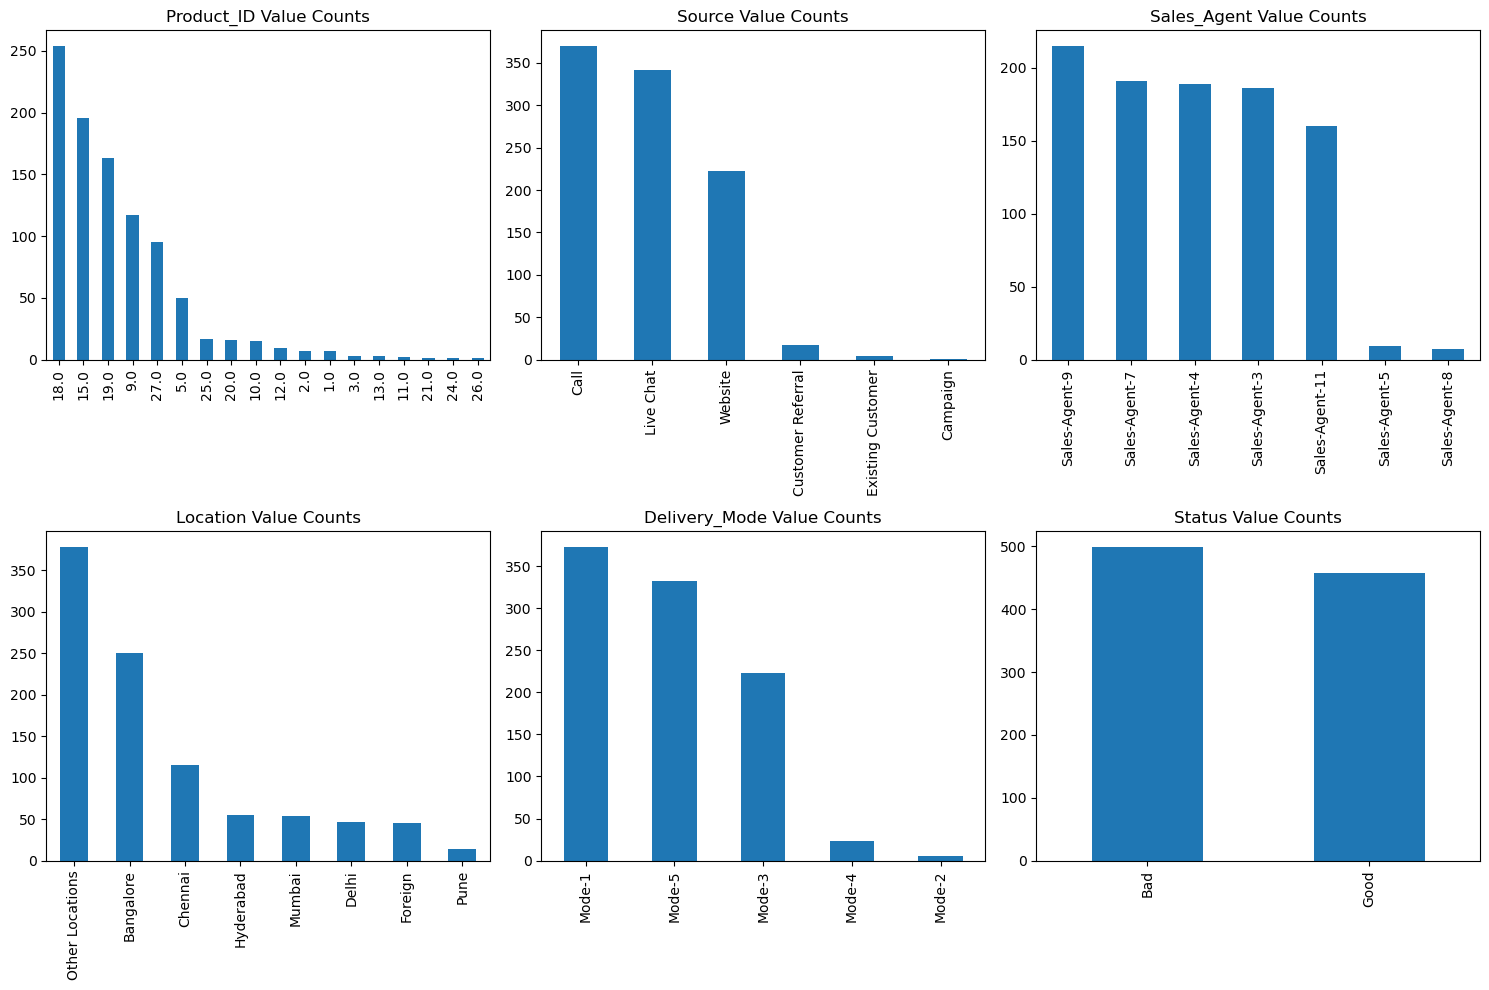

In [28]:
# Plotting the labels in each column
plt.figure(figsize=(15,10))

# Product_ID value counts
plt.subplot(2,3,1)
sales['Product_ID'].value_counts().plot(kind='bar')
plt.title('Product_ID Value Counts')

# Source value counts
plt.subplot(2,3,2)
sales['Source'].value_counts().plot(kind='bar')
plt.title('Source Value Counts')

# Sales_Agent value counts
plt.subplot(2,3,3)
sales['Sales_Agent'].value_counts().plot(kind='bar')
plt.title('Sales_Agent Value Counts')

# Location value counts
plt.subplot(2,3,4)
sales['Location'].value_counts().plot(kind='bar')
plt.title('Location Value Counts')

# Delivery_Mode value counts
plt.subplot(2,3,5)
sales['Delivery_Mode'].value_counts().plot(kind='bar')
plt.title('Delivery_Mode Value Counts')

# Status value counts
plt.subplot(2,3,6)
sales['Status'].value_counts().plot(kind='bar')
plt.title('Status Value Counts')

plt.tight_layout()
plt.show()

### Here are the insights from the bar charts visualizing the value counts for various columns
#### Product_ID:
The chart for Product_ID shows the frequency of each product in the dataset. Some products appear more frequently, which could indicate higher sales volume or popularity.

#### Source:
The Source chart would highlight which lead sources are most commonly used. A high frequency for a particular source could suggest it is a major channel for lead generation.

#### Sales_Agent:
The Sales_Agent chart would reveal which agents are handling more leads. Agents with higher counts could be more active or have a larger customer base.

#### Location:
The Location chart would show the distribution of leads across different locations. This could indicate the market reach and where the business efforts are concentrated.

#### Delivery_Mode:
The Delivery_Mode chart would indicate the preferred methods of delivery for products or services. A dominant mode could suggest customer preference or operational efficiency.

#### Status:
The Status chart provides an overview of the outcome of leads.bad leads are more as compared to good leads  

In [29]:
sales.dtypes

Product_ID       float64
Source            object
Sales_Agent       object
Location          object
Delivery_Mode     object
Status            object
dtype: object

# Encoding Categorical Variables

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
enc = LabelEncoder()
for i in (0,1,2,3,4,5):
    sales.iloc[:,i] = enc.fit_transform(sales.iloc[:,i])
sales.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12680\1734400553.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sales.iloc[:,i] = enc.fit_transform(sales.iloc[:,i])
C:\Users\DELL\AppData\Local\Temp\ipykernel_12680\1734400553.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sales.iloc[:,i] = enc.fit_transform(sales.iloc[:,i])
C:\Users\DELL\AppData\Local\Temp\ipykernel_12680\1734400553.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To re

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,4,4,1,0,0,1
1,11,0,2,6,4,1
2,10,5,0,6,0,1
3,9,5,4,4,0,0
4,10,0,4,0,0,1


In [32]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Product_ID     957 non-null    int64
 1   Source         957 non-null    int32
 2   Sales_Agent    957 non-null    int32
 3   Location       957 non-null    int32
 4   Delivery_Mode  957 non-null    int32
 5   Status         957 non-null    int32
dtypes: int32(5), int64(1)
memory usage: 26.3 KB


# Feature Engineering

In [33]:
# Checking the correlation coeffecient
sales.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,0.093264,-0.020970,-0.035047,-0.064711,0.022233
Source,0.093264,1.000000,0.007360,-0.036363,-0.327901,0.031184
Sales_Agent,-0.020970,0.007360,1.000000,-0.085395,-0.154209,0.166519
Location,-0.035047,-0.036363,-0.085395,1.000000,0.505351,-0.462852
Delivery_Mode,-0.064711,-0.327901,-0.154209,0.505351,1.000000,-0.296263
Status,0.022233,0.031184,0.166519,-0.462852,-0.296263,1.000000


<Axes: >

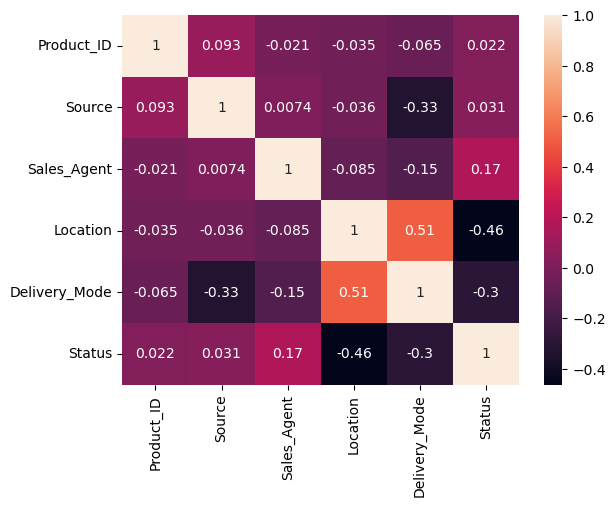

In [34]:
sns.heatmap(sales.corr(),annot=True)

In [35]:
#splitting dataset into x and y

x=sales.iloc[:,:-1]
y=sales.Status

In [36]:
x

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,4,4,1,0,0
1,11,0,2,6,4
2,10,5,0,6,0
3,9,5,4,4,0
4,10,0,4,0,0
...,...,...,...,...,...
952,4,0,6,5,0
953,11,5,0,5,2
954,10,0,1,1,0
955,11,0,0,0,4


In [37]:
y

0      1
1      1
2      1
3      0
4      1
      ..
952    0
953    1
954    1
955    1
956    1
Name: Status, Length: 957, dtype: int32

In [38]:
# Splitting into training and testing data for accuracy
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [39]:
x_train.shape

(765, 5)

In [40]:
x_test.shape

(192, 5)

In [41]:
#training the model

from sklearn.tree import DecisionTreeClassifier
classifier_tree=DecisionTreeClassifier()
params=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_gridtree=GridSearchCV(classifier_tree,params,)

# Models

## 1) Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

#training the model

log_regressor=LogisticRegression()
log_regressor.fit(x_train,y_train)

LogisticRegression()

In [43]:
#predicting the model

y_pred_log_regressor=log_regressor.predict(x_test)
y_pred_log_regressor

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1])

In [44]:
#finding accuracy,clasification report

print(accuracy_score(y_test,y_pred_log_regressor))
print(classification_report(y_test,y_pred_log_regressor))

0.75
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       103
           1       0.73      0.73      0.73        89

    accuracy                           0.75       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.75      0.75      0.75       192



In [45]:
#finding confusion matrix

print(confusion_matrix(y_test,y_pred_log_regressor))

[[79 24]
 [24 65]]


## 2) Support Vector Machine

In [46]:
#training the model

from sklearn.svm import SVC

params={'kernel':['rbf'],'gamma':[0.0001, 0.001, 0.01, 0.1, 1, 10],'C':[0.001, 0.01, 0.1, 1, 10]}
rbf_svc=GridSearchCV(SVC(),params,cv=5)
rbf_svc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['rbf']})

In [47]:
#checking the best parameters
rbf_svc.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [48]:
#predicting the model
y_pred_svc=rbf_svc.predict(x_test)
y_pred_svc

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1])

In [49]:
#finding accuracy,clasification report

print(accuracy_score(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

0.75
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       103
           1       0.73      0.74      0.73        89

    accuracy                           0.75       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.75      0.75      0.75       192



In [50]:
#finding confusion matrix

print(confusion_matrix(y_test,y_pred_svc))

[[78 25]
 [23 66]]


## 3) Decision Tree with GridsearchCV

In [51]:
#training the model

from sklearn.tree import DecisionTreeClassifier
classifier_tree=DecisionTreeClassifier(random_state=42,splitter='best')
params=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_gridtree=GridSearchCV(classifier_tree,params,scoring='accuracy',cv=10)
model_gridtree.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [52]:
#get the best parameters

model_gridtree.best_params_

{'criterion': 'gini', 'min_samples_split': 2}

In [53]:
#predicting the model
y_pred_tree=model_gridtree.predict(x_test)
y_pred_tree

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1])

In [54]:
#finding accuracy ,classification report and confusion matrix

print(accuracy_score(y_test,y_pred_tree))
print(classification_report(y_test,y_pred_tree))
print(confusion_matrix(y_test,y_pred_tree))


0.6770833333333334
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       103
           1       0.67      0.60      0.63        89

    accuracy                           0.68       192
   macro avg       0.68      0.67      0.67       192
weighted avg       0.68      0.68      0.67       192

[[77 26]
 [36 53]]


## 4) Random Forest with GridsearchCv

In [55]:
#training the model

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
params = {
    'n_estimators': [20,30,50,70,80],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

rfc_grid=GridSearchCV(rfc,params,scoring='accuracy',cv=10)
rfc_grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 30, 50, 70, 80]},
             scoring='accuracy')

In [56]:
rfc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 30}

In [57]:
#predicting the model

y_pred_rfc=rfc_grid.predict(x_test)
y_pred_rfc

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [58]:
#finding accuracy ,classification report and confusion matrix

print(accuracy_score(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))
print(confusion_matrix(y_test,y_pred_rfc))

0.7708333333333334
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       103
           1       0.76      0.74      0.75        89

    accuracy                           0.77       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.77      0.77      0.77       192

[[82 21]
 [23 66]]


## 5) Naive Bayes Bernoulli

In [59]:
#training the model

from sklearn.naive_bayes import BernoulliNB
model_nb=BernoulliNB()
model_nb.fit(x_train,y_train)

BernoulliNB()

In [60]:
#predicting the model

y_pred_nb=model_nb.predict(x_test)
y_pred_nb

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [61]:
#finding accuracy , classification report and confusion matrix

print(accuracy_score(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))
print(confusion_matrix(y_test,y_pred_nb))

0.71875
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       103
           1       0.72      0.65      0.68        89

    accuracy                           0.72       192
   macro avg       0.72      0.71      0.72       192
weighted avg       0.72      0.72      0.72       192

[[80 23]
 [31 58]]


## 6) K-Nearest Neighbor with GridSearchCV

In [62]:
#training the model

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
params={'n_neighbors':[3,5,7,10]}
knn_grid=GridSearchCV(knn,params,scoring='accuracy',cv=10)
knn_grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 10]}, scoring='accuracy')

In [63]:
# predicting the model
y_pred_knn=knn_grid.predict(x_test)
y_pred_knn

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1])

In [64]:
#finding accuracy ,classification report and confusion matrix

print(accuracy_score(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))
print(confusion_matrix(y_test,y_pred_knn))

0.7083333333333334
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       103
           1       0.71      0.63      0.67        89

    accuracy                           0.71       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.71      0.71      0.71       192

[[80 23]
 [33 56]]


## 7) XGBoost Classifier

In [65]:
!pip install xgboost

In [66]:
#training the model
from xgboost import XGBClassifier
xgb_classifier =XGBClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    objective='binary:logistic',
    eval_metric='logloss'
)
xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [67]:
#predicting the model

y_pred_xgb=xgb_classifier.predict(x_test)
y_pred_xgb

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [68]:
#finding the accuracy ,classification report and confusion matrix

print(accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))

0.6875
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       103
           1       0.66      0.66      0.66        89

    accuracy                           0.69       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.69      0.69      0.69       192

[[73 30]
 [30 59]]


## 8) Artificial Neural Network

In [69]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(x_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [70]:
#testing the model

y_pred_mlp=model_mlp.predict(x_test)
y_pred_mlp

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1])

In [71]:
#finding accuracy , classification report and confusion matrix

print(accuracy_score(y_test,y_pred_mlp))
print(classification_report(y_test,y_pred_mlp))
print(confusion_matrix(y_test,y_pred_mlp))

0.7083333333333334
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       103
           1       0.70      0.65      0.67        89

    accuracy                           0.71       192
   macro avg       0.71      0.70      0.71       192
weighted avg       0.71      0.71      0.71       192

[[78 25]
 [31 58]]
